In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
sales = pd.read_csv("Mall_Customers.csv")

In [28]:
sales.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
sales.shape

(200, 5)

# UNIVARIATE ANALYSIS

In [30]:
sales.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


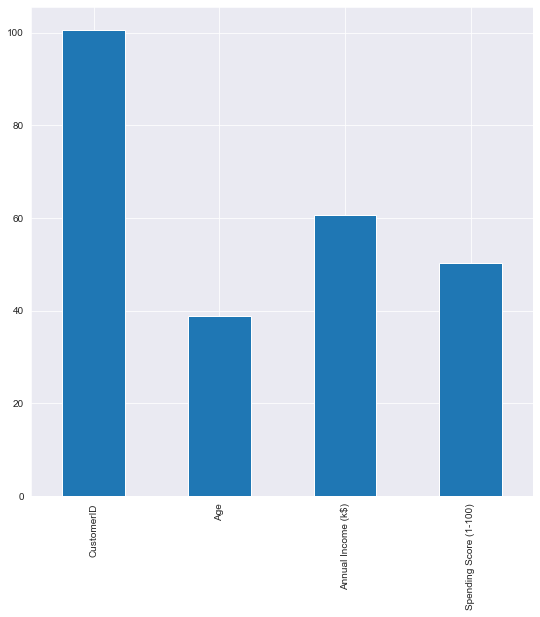

In [31]:
sales_describe = sales.describe()
sales_describe.loc['mean']
sales_describe.loc['mean'].plot.bar()
plt.show()

In [32]:
sales.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

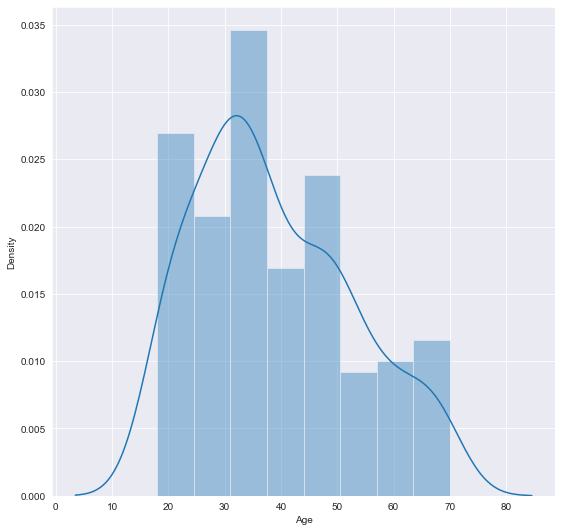

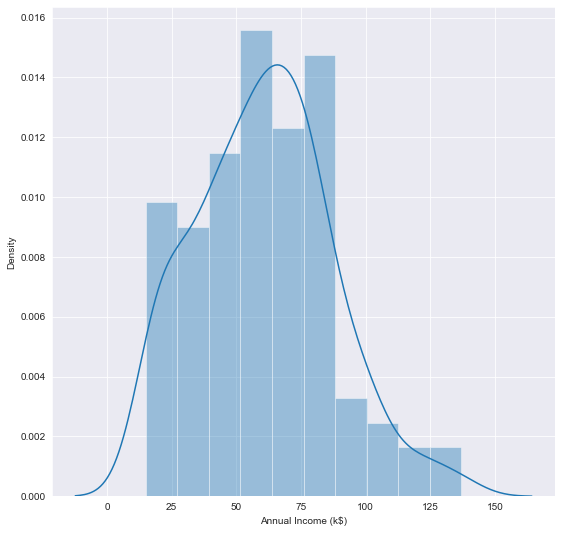

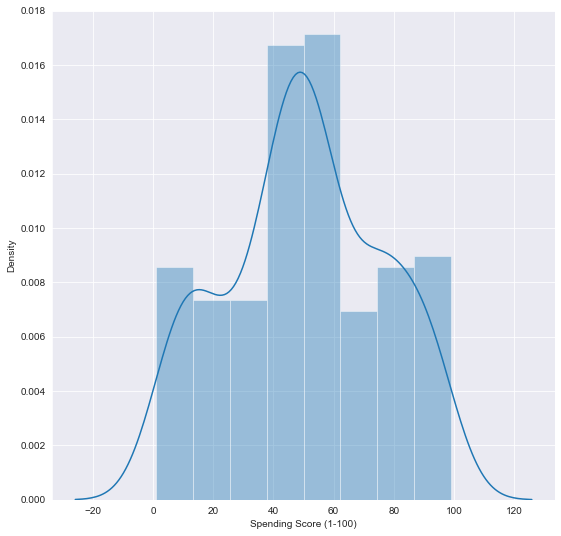

In [33]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(sales[i])

# BIVARIATE ANALYSIS

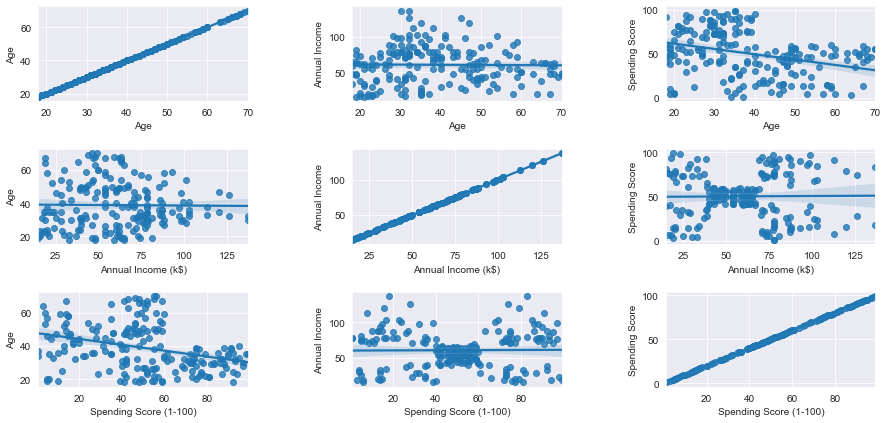

In [34]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = sales)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [35]:
sales.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [36]:
sales.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


#  CUSTOMER PROFILING

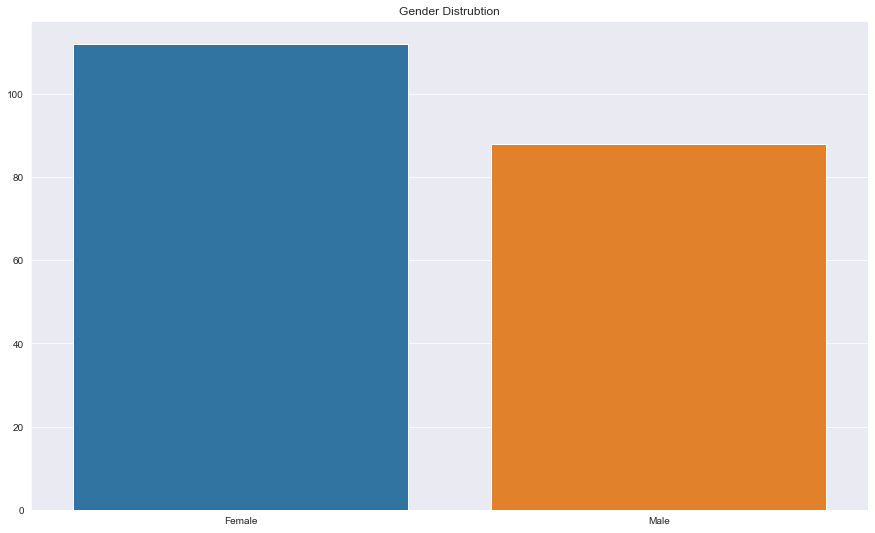

In [37]:
genders = sales.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(15,9))
plt.title("Gender Distrubtion")
sns.barplot(x=genders.index, y=genders.values)
plt.show()

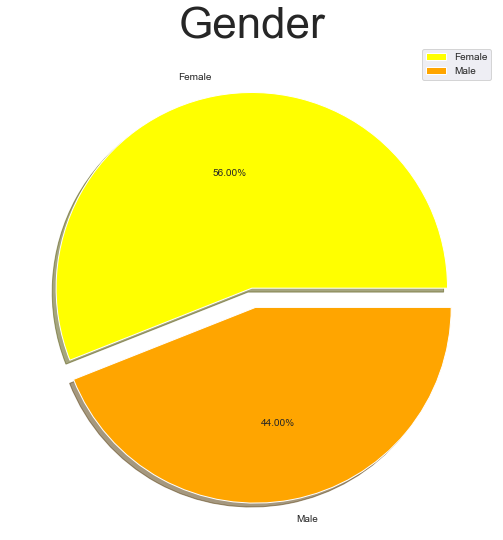

In [38]:
labels = ['Female', 'Male']
size = sales['Gender'].value_counts()
colors = ['yellow', 'orange']
explode = [0, 0.1]
 
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 44 )
plt.axis('off')
plt.legend()
plt.show()

In [39]:
sales[['Age', 'Annual Income (k$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0


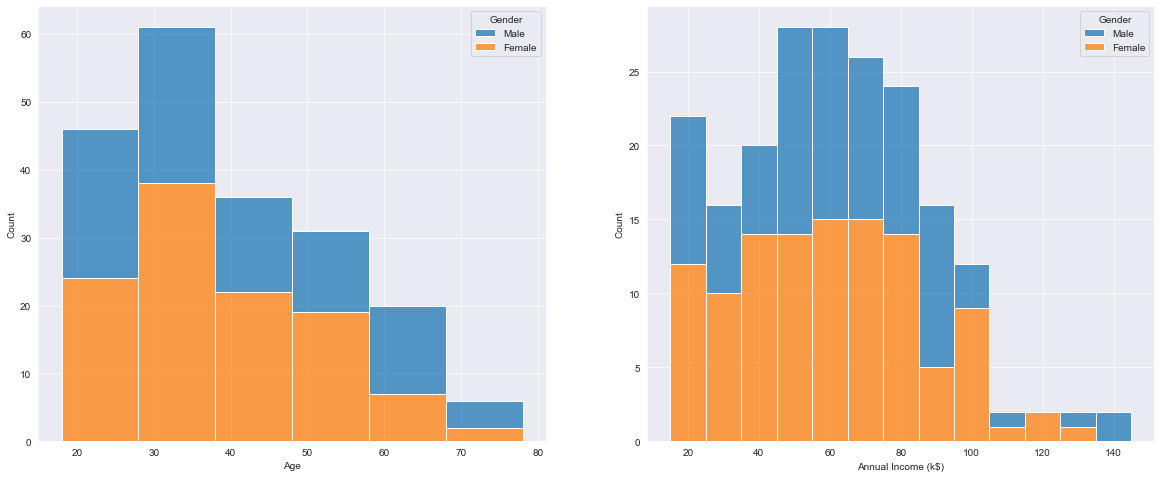

In [40]:
__, (xx0, xx1) = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=sales, x='Age', hue='Gender', binwidth=10, multiple='stack', ax=xx0)
sns.histplot(data=sales, x='Annual Income (k$)', hue='Gender', binwidth=10, multiple='stack', ax=xx1);

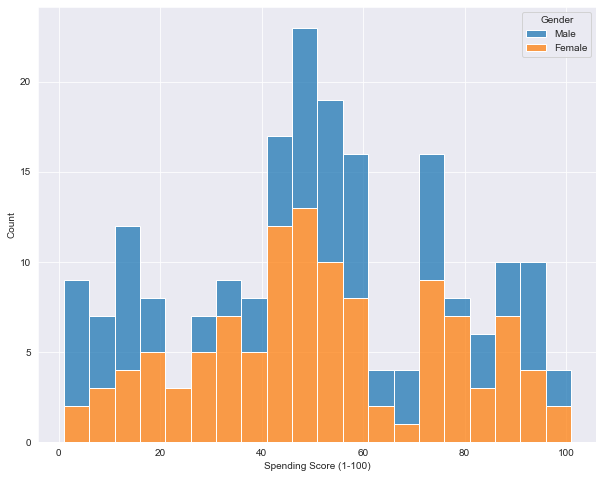

In [41]:
plt.figure(figsize=(10, 8))

sns.histplot(data=sales, x='Spending Score (1-100)', hue='Gender', binwidth = 5, multiple='stack');

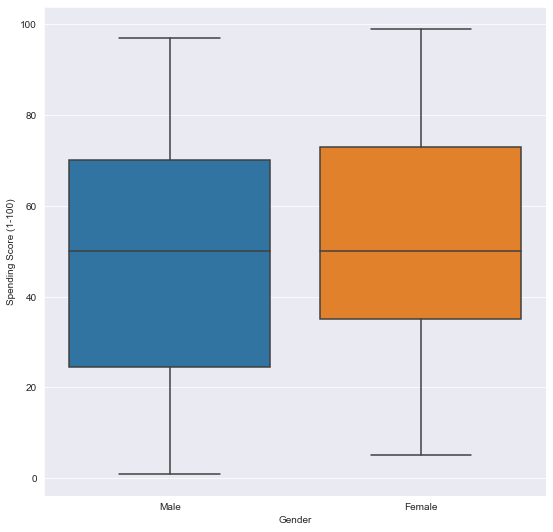

In [42]:
sns.boxplot(data=sales, x='Gender', y='Spending Score (1-100)');

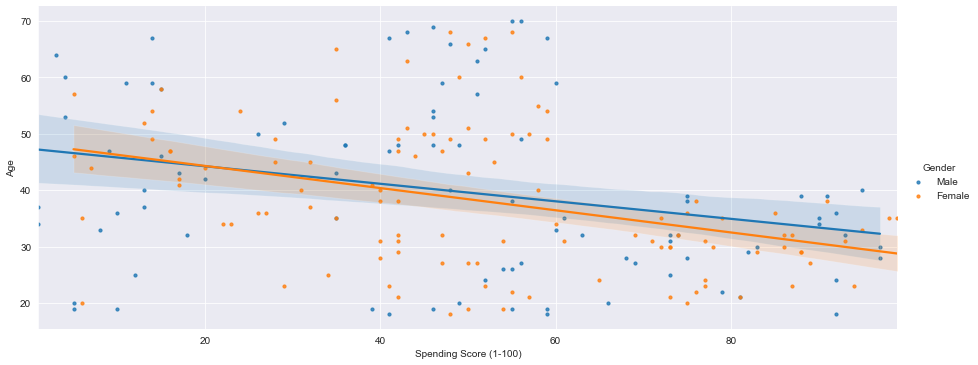

In [43]:
sns.lmplot(
    data= sales,
    x='Spending Score (1-100)', 
    y='Age', 
    hue='Gender',
    aspect=2.5,
    scatter_kws={'s': 10, 'alpha': 0.8}
);

In [44]:
def introduce_spending_groups(spending_score):
    if spending_score <= 30:
        return 'low'
    if spending_score > 30 and spending_score <= 60:
        return 'medium'
    if spending_score > 60:
        return 'high'

sales['Spending Groups'] = sales['Spending Score (1-100)'].apply(introduce_spending_groups)

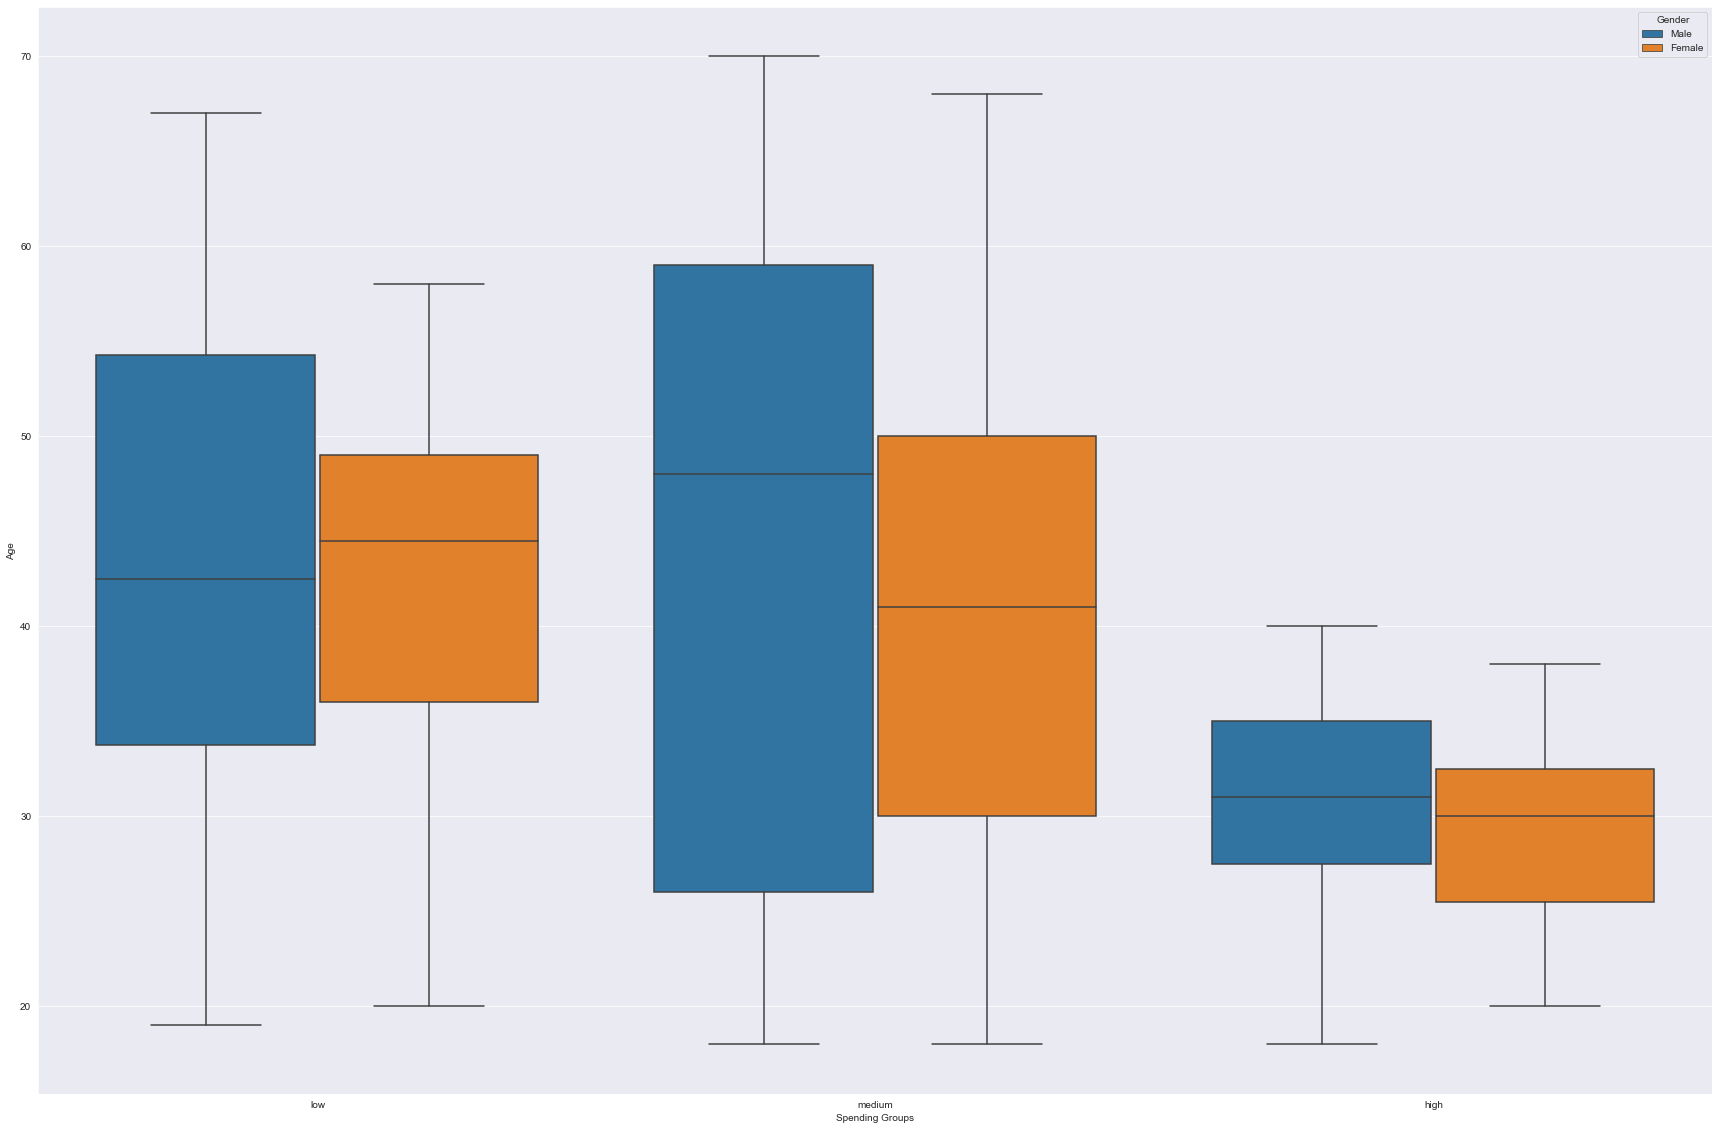

In [20]:
plt.figure(figsize=(30, 20))
sns.boxplot(data=sales, x='Spending Groups', y='Age', hue='Gender', order=['low', 'medium', 'high']);

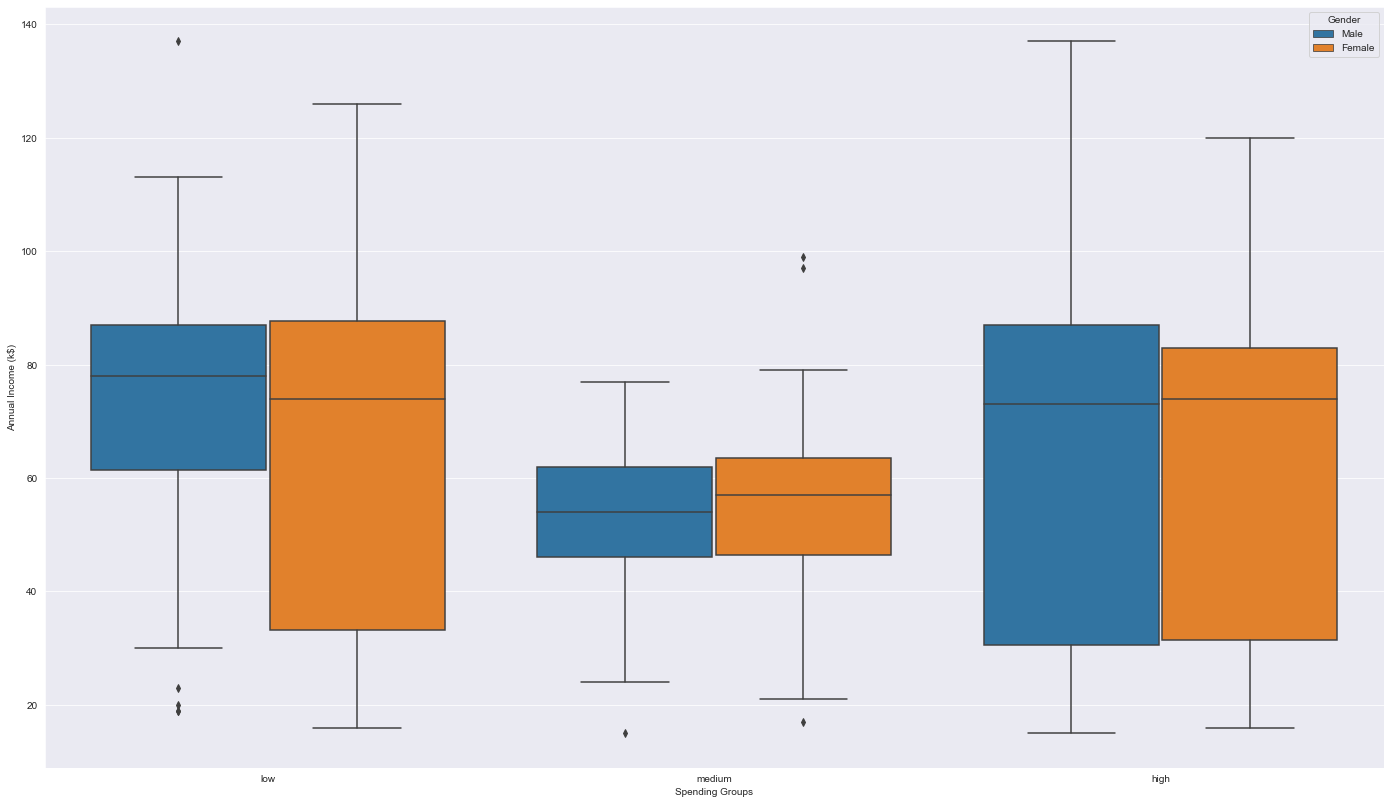

In [21]:
plt.figure(figsize=(24, 14))
sns.boxplot(data=sales, x='Spending Groups', y='Annual Income (k$)', hue='Gender', order=['low', 'medium', 'high']);

# CLUSTERING 

In [22]:
df1=sales[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

K=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [23]:
K.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


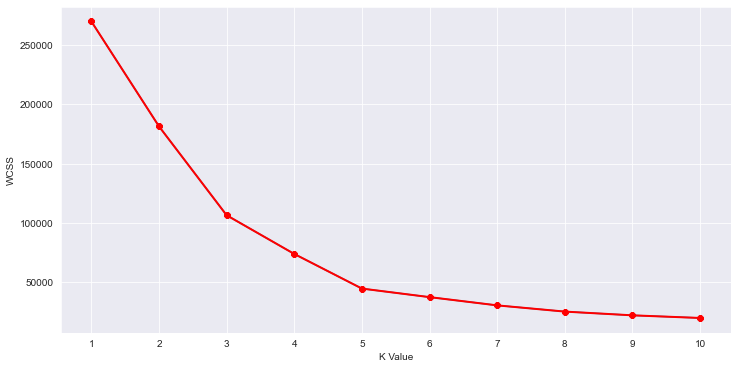

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(K)
    wcss.append(km.inertia_)
plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss)

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [25]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(K)


In [46]:
df1["label"] = y

In [47]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [48]:
K=df1.iloc[:,[3,4]].values # Taking  Annual income and Spending Score as the features 

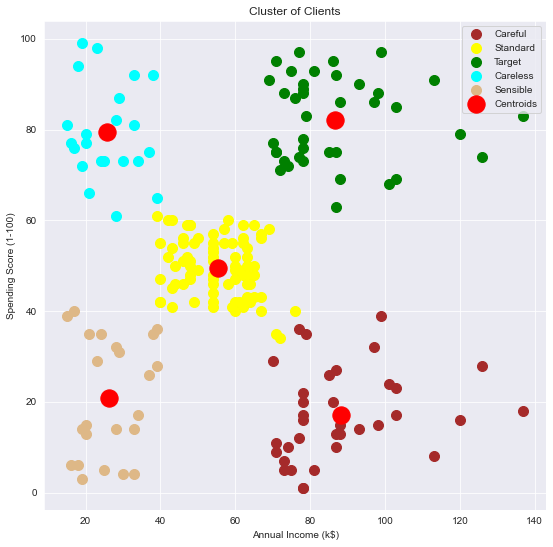

In [50]:
plt.scatter(K[y_kmeans==0,0],K[y_kmeans==0,1],s=100,c='brown',label='Careful')
plt.scatter(K[y_kmeans==1,0],K[y_kmeans==1,1],s=100,c='yellow',label='Standard')
plt.scatter(K[y_kmeans==2,0],K[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(K[y_kmeans==3,0],K[y_kmeans==3,1],s=100,c='cyan',label='Careless')
plt.scatter(K[y_kmeans==4,0],K[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show
pass

In [51]:
customer1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(customer1))
print('They are -', customer1["CustomerID"].values)
print("--------------------------------------------")
customer2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(customer2))
print('They are -',customer2["CustomerID"].values)
print("--------------------------------------------")
customer3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(customer3))
print('They are -', customer3["CustomerID"].values)
print("--------------------------------------------")
customer4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(customer4))
print('They are -',customer4["CustomerID"].values)
print("--------------------------------------------")
customer5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(customer5))
print('They are -', customer5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 2nd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 3rd group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------
Number of customer in 4th group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 1

In [52]:
df2=sales[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df2[["Age","Spending Score (1-100)"]]

In [53]:
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


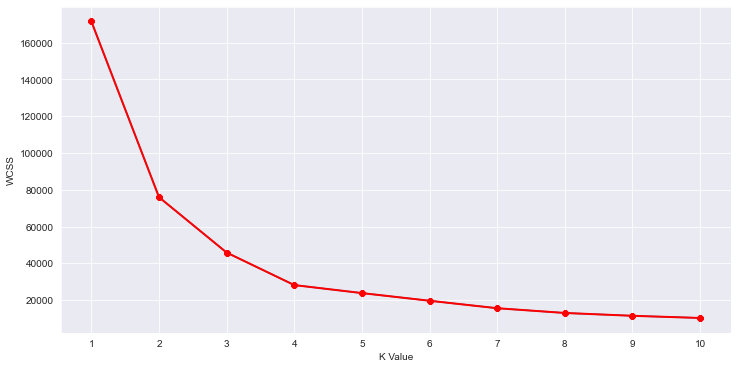

In [54]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss)

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [55]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [56]:
X=sales.iloc[:,[2,4]].values # Taking the  Age and Spending Score as the features 
#X

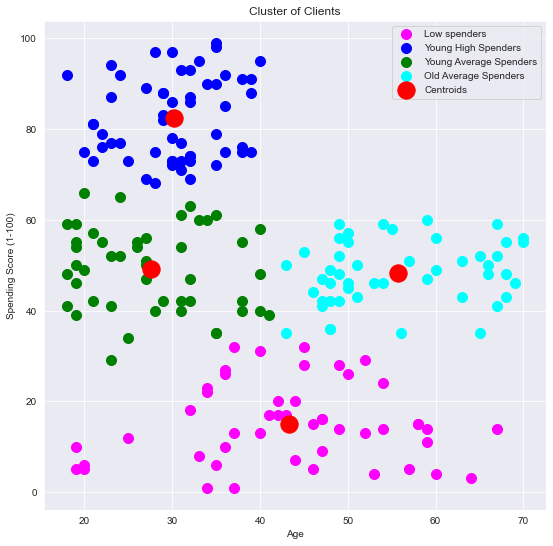

In [57]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Low spenders ')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Young High Spenders')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Young Average Spenders')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Old Average Spenders')
#plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
#plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=100,c='blue',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()
pass

In [58]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 2nd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 3rd group= 81
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
--------------------------------------------
Number of customer in 4th group= 35
They are - [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 1

In [59]:
X3 = sales[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

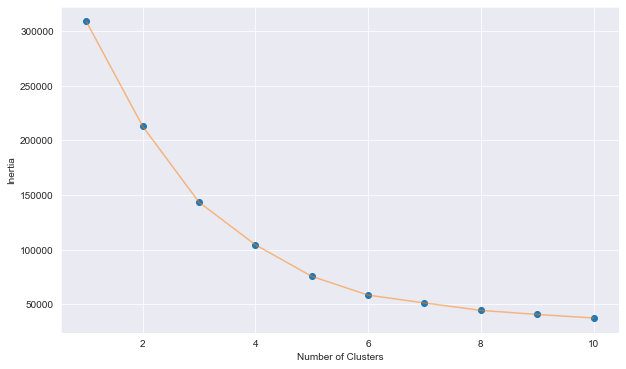

In [60]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [61]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [62]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)
sales['label3'] =  labels3
trace1 = go.Scatter3d(
    x= sales['Age'],
    y= sales['Spending Score (1-100)'],
    z= sales['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = sales['label3'], 
        size= 20,
        line=dict(
            color= sales['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

In [63]:
sales["label"] = labels3

In [64]:
cust1=sales[sales["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=sales[sales["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=sales[sales["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=sales[sales["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=sales[sales["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("-------")


Number of customer in 1st group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 2nd group= 37
They are - [125 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161
 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197
 199]
--------------------------------------------
Number of customer in 3rd group= 76
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 127]
--------------------------------------------
Number of customer in 4th group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
array = df1.values
X =  array[:,3:6]
y = df1['Age']
X_train, X_test,y_train,y_test =  train_test_split(X,y,test_size=0.20,random_state=70)
k_means = KMeans(n_clusters=2)
k_means.fit(X_train)
y_prediction = k_means.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  -6.622611237486127
mean_sqrd_error is== 1734.125
root_mean_squared error of is== 41.64282651309827
